In [1]:
import streamlit as st
import pandas as pd
import numpy as np
import time
import joblib
import locale
import plot_likert
from math import pi

import matplotlib.pyplot as plt # plotting library

In [2]:
survey_df = pd.read_csv('data/ktp_climate_survey_2nd_cycle.csv').reset_index()
survey_df

,index,Timestamp,CONSENT SURVEY:,Name of Your Company:,What age group do you belong to?,What is your sex?,What is your highest education attainment?,What region are you from?,Are you part of Management or Staff?,01) My job offers me the opportunity to develop myself.,...,31) There are clear and concrete measures for TQM success in the company..1,32) This organization’s planning and control efforts are helpful in its growth and development..1,33) This organization has the ability to change..1,34) The Company executives provide the leadership necessary for change..1,35) Management communicates quality directions extensively throughout the organization by actions as well as words..1,36) The company recognizes the need for backups even at the expense of short-term efficiency..1,37) There is a written business strategy that includes vision and/or mission statements..1,"38) The company's ""Quality Policy"" articulates the commitment to excellence and the importance of customer satisfaction..1",39) The business strategy statement is widely communicated company-wide..1,40) General assembly meetings are conducted at least twice a year wherein the results of the strategic planning is shared..1
0,0,5/24/2022 14:08:25,AGREE,Agri-Component Machineries and Construction Co...,41 to 50 years old,Male,College Graduate,Region IX: Zamboanga Peninsula,Management,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,6/3/2022 16:53:19,AGREE,Diamond Noodles Factory,21 to 30 years old,Male,College Graduate,Region IX: Zamboanga Peninsula,Management,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,6/24/2022 10:11:00,AGREE,Agri-Component Machineries and Construction Co...,50 to 60 years old,Male,College Graduate,Region II: Cagayan Valley,Management,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,6/25/2022 13:17:55,AGREE,SLERS Industries Inc.,41 to 50 years old,Female,College Graduate,Region X: Northern Mindanao,Management,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,6/25/2022 13:31:01,AGREE,SLERS Industries Inc.,21 to 30 years old,Female,College Level,Region X: Northern Mindanao,Staff,NaN,...,6.0,6.0,5.0,6.0,6.0,6.0,7.0,7.0,6.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,7/19/2022 15:50:41,AGREE,Wood Tech Builders,60 years old and above,Male,High School Level,Region IX: Zamboanga Peninsula,Management,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,96,7/19/2022 15:50:42,AGREE,Wood Tech Builders,60 years old and above,Male,Elementary,Region IX: Zamboanga Peninsula,Management,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,97,7/19/2022 15:50:48,AGREE,Wood Tech Builders,50 to 60 years old,Male,High School Graduate,Region IX: Zamboanga Peninsula,Management,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,98,7/19/2022 16:01:53,AGREE,Diamond Noodles Factory,21 to 30 years old,Male,High School Level,Region IX: Zamboanga Peninsula,Staff,NaN,...,7.0,7.0,7.0,7.0,6.0,6.0,6.0,6.0,6.0,6.0


In [3]:
np_survey_df = np.asarray(survey_df)
# np_survey_df

managers = survey_df[survey_df["Are you part of Management or Staff?"] == "Management"]
# managers
staffs = survey_df[survey_df["Are you part of Management or Staff?"] == "Staff"]

managers

,index,Timestamp,CONSENT SURVEY:,Name of Your Company:,What age group do you belong to?,What is your sex?,What is your highest education attainment?,What region are you from?,Are you part of Management or Staff?,01) My job offers me the opportunity to develop myself.,...,31) There are clear and concrete measures for TQM success in the company..1,32) This organization’s planning and control efforts are helpful in its growth and development..1,33) This organization has the ability to change..1,34) The Company executives provide the leadership necessary for change..1,35) Management communicates quality directions extensively throughout the organization by actions as well as words..1,36) The company recognizes the need for backups even at the expense of short-term efficiency..1,37) There is a written business strategy that includes vision and/or mission statements..1,"38) The company's ""Quality Policy"" articulates the commitment to excellence and the importance of customer satisfaction..1",39) The business strategy statement is widely communicated company-wide..1,40) General assembly meetings are conducted at least twice a year wherein the results of the strategic planning is shared..1
0,0,5/24/2022 14:08:25,AGREE,Agri-Component Machineries and Construction Co...,41 to 50 years old,Male,College Graduate,Region IX: Zamboanga Peninsula,Management,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,6/3/2022 16:53:19,AGREE,Diamond Noodles Factory,21 to 30 years old,Male,College Graduate,Region IX: Zamboanga Peninsula,Management,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,6/24/2022 10:11:00,AGREE,Agri-Component Machineries and Construction Co...,50 to 60 years old,Male,College Graduate,Region II: Cagayan Valley,Management,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,6/25/2022 13:17:55,AGREE,SLERS Industries Inc.,41 to 50 years old,Female,College Graduate,Region X: Northern Mindanao,Management,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,6/29/2022 12:12:39,AGREE,VFM Food Products,50 to 60 years old,Female,College Graduate,Cordillera Administrative Region (CAR),Management,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,11,6/29/2022 21:26:11,AGREE,VFM Food Products,60 years old and above,Male,College Level,Cordillera Administrative Region (CAR),Management,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,17,7/7/2022 13:42:55,AGREE,Rejanos Bakery,41 to 50 years old,Female,College Level,Region IV-B: (Mimaropa) Southwestern Tagalog R...,Management,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,22,7/8/2022 12:29:23,AGREE,Rejanos Bakery,60 years old and above,Female,College Graduate,Region IV-B: (Mimaropa) Southwestern Tagalog R...,Management,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,25,7/11/2022 10:55:58,AGREE,MAFFISCO-MPC,60 years old and above,Female,College Graduate,Region XIII: Caraga,Management,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,26,7/11/2022 10:59:11,AGREE,MAFFISCO-MPC,50 to 60 years old,Male,College Level,Region XIII: Caraga,Management,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


DEMOGRAPHICS

In [4]:
regions_df = demo_respondents_group = survey_df['What region are you from?']
regions_df = np.asarray(regions_df)

regions, region_counts = np.unique(regions_df, return_counts=True)
regions

array(['Cordillera Administrative Region (CAR)',
       'Region II: Cagayan Valley', 'Region III: Central Luzon',
       'Region IV-B: (Mimaropa) Southwestern Tagalog Region',
       'Region IX: Zamboanga Peninsula', 'Region VII: Central Visayas',
       'Region X: Northern Mindanao', 'Region XIII: Caraga'], dtype=object)

In [5]:
region_counts # respondents per region

array([ 6,  1,  1, 11, 44,  2, 12, 23], dtype=int64)

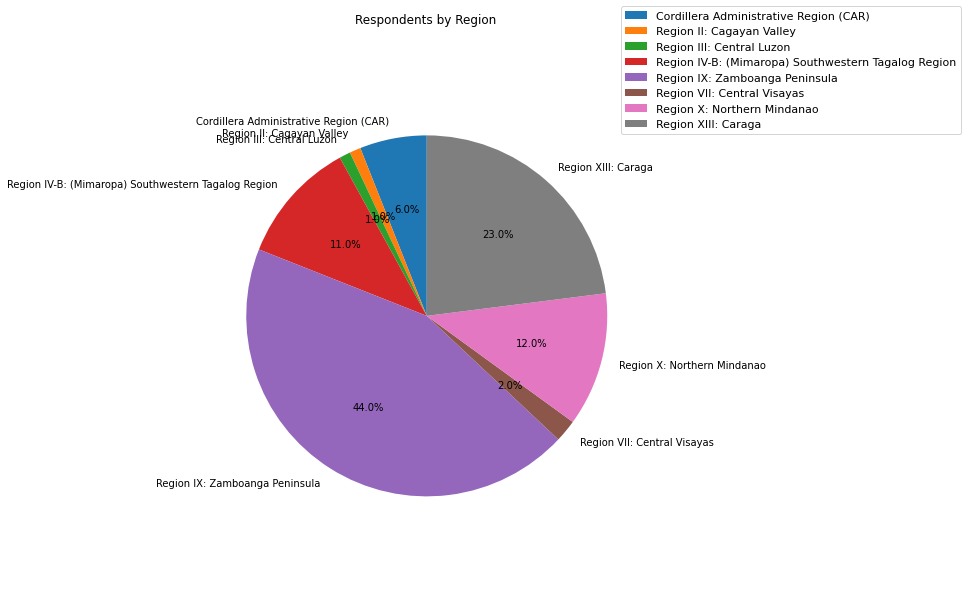

In [6]:
fig1, ax1 = plt.subplots(figsize=(8, 8))
fig1.subplots_adjust(0.3,0,1,1)

ax1.axis('equal')

plt.pie(region_counts, labels = regions, autopct='%1.1f%%', shadow=False, startangle = 90)
plt.legend(
    loc='upper left',
    prop={'size': 11},
    bbox_to_anchor=(0.98, 1.05), # x,y coordinates
    bbox_transform=fig1.transFigure
)
plt.title('Respondents by Region')
plt.axis('equal')
plt.show() 

In [7]:
# Management / Staff
demo_respondents_group = survey_df['Are you part of Management or Staff?']
group_df = np.asarray(demo_respondents_group)
group, group_counts = np.unique(group_df, return_counts=True)

# Gender
demo_respondents_sex = survey_df['What is your sex?']
sex_df = np.asarray(demo_respondents_sex)
gender, gender_counts = np.unique(sex_df, return_counts=True)

# Age Group
demo_respondents_age_group = survey_df['What age group do you belong to?']
age_group_df = np.asarray(demo_respondents_age_group)
age_group, age_group_counts = np.unique(age_group_df, return_counts=True)

# Education
demo_respondents_education = survey_df['What is your highest education attainment?']
education_df = np.asarray(demo_respondents_education)
education, education_counts = np.unique(education_df, return_counts=True)

In [8]:
group_counts

array([34, 66], dtype=int64)

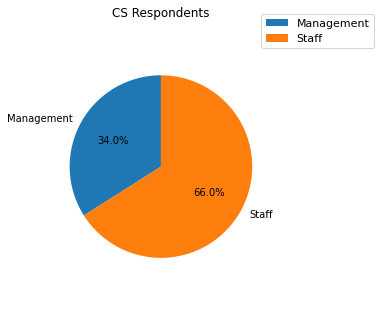

In [9]:
# Management / Staff
fig1, ax1 = plt.subplots(figsize=(4, 4))
fig1.subplots_adjust(0.3,0,1,1)
ax1.axis('equal')
plt.pie(group_counts, labels = group, autopct='%1.1f%%', shadow=False, startangle = 90)
plt.legend(
    loc='upper left',
    prop={'size': 11},
    bbox_to_anchor=(0.98, 1.05), # x,y coordinates
    bbox_transform=fig1.transFigure
)
plt.title('CS Respondents')
plt.axis('equal')
plt.show() 

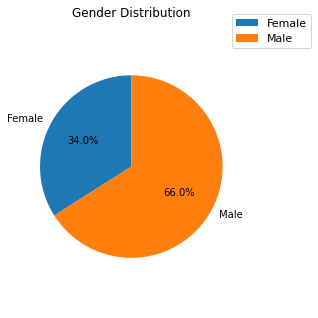

In [10]:
# Gender Pie
fig1, ax1 = plt.subplots(figsize=(4, 4))
fig1.subplots_adjust(0.3,0,1,1)
ax1.axis('equal')
plt.pie(gender_counts, labels = gender, autopct='%1.1f%%', shadow=False, startangle = 90)
plt.legend(
    loc='upper left',
    prop={'size': 11},
    bbox_to_anchor=(0.98, 1.05), # x,y coordinates
    bbox_transform=fig1.transFigure
)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show() 

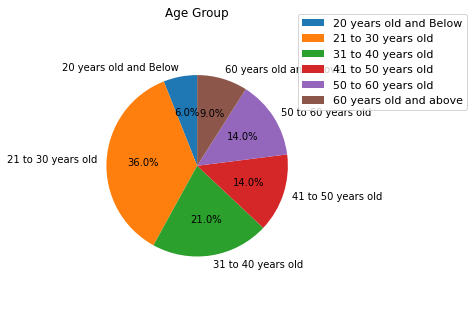

In [11]:
# Age Group Pie
fig1, ax1 = plt.subplots(figsize=(4, 4))
fig1.subplots_adjust(0.3,0,1,1)
ax1.axis('equal')
plt.pie(age_group_counts, labels = age_group, autopct='%1.1f%%', shadow=False, startangle = 90)
plt.legend(
    loc='upper left',
    prop={'size': 11},
    bbox_to_anchor=(0.98, 1.05), # x,y coordinates
    bbox_transform=fig1.transFigure
)
plt.title('Age Group')
plt.axis('equal')
plt.show() 

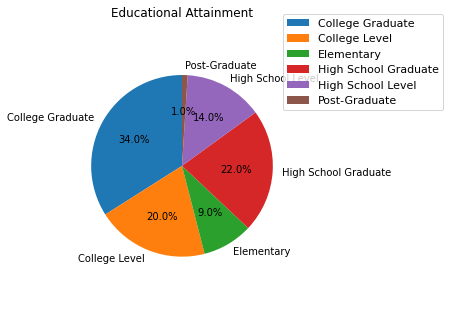

In [12]:
# Educational Attainment
fig1, ax1 = plt.subplots(figsize=(4, 4))
fig1.subplots_adjust(0.3,0,1,1)
ax1.axis('equal')
plt.pie(education_counts, labels = education, autopct='%1.1f%%', shadow=False, startangle = 90)
plt.legend(
    loc='upper left',
    prop={'size': 11},
    bbox_to_anchor=(0.98, 1.05), # x,y coordinates
    bbox_transform=fig1.transFigure
)
plt.title('Educational Attainment')
plt.axis('equal')
plt.show()

General Survey Results

In [13]:
managers = survey_df[survey_df["Are you part of Management or Staff?"] == "Management"]
staff = survey_df[survey_df["Are you part of Management or Staff?"] == "Staff"]

np_managers = np.asarray(managers)
# np_managers[:,9:59]

np_staff = np.asarray(staff)
# np_staff[:,60:101]

# np_staff[:,9:59].shape
# staff

In [14]:
np_managers[:,9:59]

array([[7.0, 6.0, 7.0, ..., 5.0, 6.0, 6.0],
       [7.0, 7.0, 7.0, ..., 3.0, 3.0, 6.0],
       [7.0, 7.0, 7.0, ..., 7.0, 6.0, 7.0],
       ...,
       [5.0, 7.0, 6.0, ..., 6.0, 6.0, 6.0],
       [6.0, 7.0, 7.0, ..., 7.0, 7.0, 7.0],
       [4.0, 6.0, 6.0, ..., 6.0, 7.0, 7.0]], dtype=object)

In [15]:
np_managers[:,9:59].shape

(34, 50)

In [16]:
np_staff[:,59:99]

array([[6.0, 7.0, 7.0, ..., 7.0, 6.0, 7.0],
       [5.0, 5.0, 5.0, ..., 5.0, 4.0, 5.0],
       [7.0, 7.0, 7.0, ..., 7.0, 6.0, 6.0],
       ...,
       [6.0, 5.0, 5.0, ..., 6.0, 6.0, 6.0],
       [7.0, 7.0, 6.0, ..., 6.0, 6.0, 6.0],
       [7.0, 4.0, 5.0, ..., 7.0, 7.0, 7.0]], dtype=object)

In [17]:
np_staff[:,59:99].shape

(66, 40)

In [18]:
# Get MEANS for Managers on all questions
managers_mean = np.mean(np_managers[:,9:59], axis=0)
managers_mean


array([6.352941176470588, 6.264705882352941, 6.205882352941177,
       6.264705882352941, 6.470588235294118, 6.323529411764706,
       6.470588235294118, 6.0, 5.852941176470588, 6.323529411764706,
       6.117647058823529, 6.470588235294118, 5.911764705882353,
       6.264705882352941, 6.4411764705882355, 6.029411764705882,
       6.0588235294117645, 6.0588235294117645, 6.411764705882353, 6.0,
       6.147058823529412, 6.352941176470588, 6.264705882352941,
       5.9411764705882355, 5.911764705882353, 5.970588235294118,
       6.029411764705882, 5.735294117647059, 6.4411764705882355,
       5.882352941176471, 6.0588235294117645, 6.294117647058823,
       6.205882352941177, 6.264705882352941, 6.088235294117647,
       5.882352941176471, 5.970588235294118, 6.294117647058823,
       6.147058823529412, 5.9411764705882355, 6.323529411764706,
       6.147058823529412, 6.205882352941177, 6.088235294117647,
       5.9411764705882355, 5.705882352941177, 5.882352941176471,
       6.1176470588235

In [19]:
# Select MEANS for Objective 1 questions
managers_objective_1 = [managers_mean[5], managers_mean[11], managers_mean[19], managers_mean[36], managers_mean[37]]
managers_objective_1 = np.asarray(managers_objective_1)

# Select MEANS for Objective 2 questions
managers_objective_2 = [managers_mean[3], managers_mean[6], managers_mean[8], managers_mean[24], managers_mean[33], managers_mean[34]]
managers_objective_2 = np.asarray(managers_objective_2)

# Select MEANS for Objective 3 questions
managers_objective_3 = [managers_mean[1], managers_mean[2], managers_mean[9], managers_mean[21], managers_mean[22]]
managers_objective_3 = np.asarray(managers_objective_3)

# Select MEANS for Objective 4 questions
managers_objective_4 = [managers_mean[14], managers_mean[15], managers_mean[16], managers_mean[23], managers_mean[38]]
managers_objective_4 = np.asarray(managers_objective_4)

# Select MEANS for Objective 5 questions
managers_objective_5 = [managers_mean[0], managers_mean[10], managers_mean[30], managers_mean[31], managers_mean[39]]
managers_objective_5 = np.asarray(managers_objective_5)

# Select MEANS for Objective 6 questions
managers_objective_6 = [managers_mean[4], managers_mean[18], managers_mean[20], managers_mean[28], managers_mean[32]]
managers_objective_6 = np.asarray(managers_objective_6)

# Select MEANS for Objective 7 questions
managers_objective_7 = [managers_mean[12], managers_mean[13], managers_mean[17], managers_mean[27]]
managers_objective_7 = np.asarray(managers_objective_7)

# Select MEANS for Objective 7 questions
managers_objective_8 = [managers_mean[40], managers_mean[41], managers_mean[42], managers_mean[43], managers_mean[44], managers_mean[45], managers_mean[46], managers_mean[47], managers_mean[48], managers_mean[49]]
managers_objective_8 = np.asarray(managers_objective_8)

# Select MEANS for Objective 9 questions
managers_objective_9 = [managers_mean[7], managers_mean[25], managers_mean[26], managers_mean[29], managers_mean[35]]
managers_objective_9 = np.asarray(managers_objective_9)
managers_objective_9

array([6.        , 5.97058824, 6.02941176, 5.88235294, 5.88235294])

In [20]:
# Get MEANS for Managers on all questions
staff_mean = np.mean(np_staff[:,59:99], axis=0)
staff_mean

array([5.575757575757576, 5.606060606060606, 5.318181818181818,
       5.666666666666667, 5.833333333333333, 5.803030303030303,
       5.96969696969697, 5.712121212121212, 5.424242424242424,
       5.666666666666667, 5.787878787878788, 6.0606060606060606,
       5.545454545454546, 5.7727272727272725, 5.742424242424242,
       5.7727272727272725, 5.757575757575758, 5.681818181818182,
       5.893939393939394, 5.954545454545454, 5.651515151515151,
       5.909090909090909, 5.893939393939394, 5.424242424242424,
       5.681818181818182, 5.424242424242424, 5.393939393939394,
       5.303030303030303, 6.242424242424242, 5.46969696969697,
       5.7272727272727275, 5.742424242424242, 6.106060606060606,
       5.984848484848484, 5.818181818181818, 5.712121212121212,
       5.590909090909091, 5.9393939393939394, 5.606060606060606,
       5.590909090909091], dtype=object)

In [21]:
# Select MEANS for Objective 1 questions
staff_objective_1 = [staff_mean[5], staff_mean[11], staff_mean[19], staff_mean[36], staff_mean[37]]
staff_objective_1 = np.asarray(staff_objective_1)

# Select MEANS for Objective 2 questions
staff_objective_2 = [staff_mean[3], staff_mean[6], staff_mean[8], staff_mean[24], staff_mean[33], staff_mean[34]]
staff_objective_2 = np.asarray(staff_objective_2)

# Select MEANS for Objective 3 questions
staff_objective_3 = [staff_mean[1], staff_mean[2], staff_mean[9], staff_mean[21], staff_mean[22]]
staff_objective_3 = np.asarray(staff_objective_3)

# Select MEANS for Objective 4 questions
staff_objective_4 = [staff_mean[14], staff_mean[15], staff_mean[16], staff_mean[23], staff_mean[38]]
staff_objective_4 = np.asarray(staff_objective_4)

# Select MEANS for Objective 5 questions
staff_objective_5 = [staff_mean[0], staff_mean[10], staff_mean[30], staff_mean[31], staff_mean[39]]
staff_objective_5 = np.asarray(staff_objective_5)

# Select MEANS for Objective 6 questions
staff_objective_6 = [staff_mean[4], staff_mean[18], staff_mean[20], staff_mean[28], staff_mean[32]]
staff_objective_6 = np.asarray(staff_objective_6)

# Select MEANS for Objective 7 questions
staff_objective_7 = [staff_mean[12], staff_mean[13], staff_mean[17], staff_mean[27]]
staff_objective_7 = np.asarray(staff_objective_7)

# Select MEANS for Objective 9 questions
staff_objective_9 = [staff_mean[7], staff_mean[25], staff_mean[26], staff_mean[29], staff_mean[35]]
staff_objective_9 = np.asarray(staff_objective_9)
# staff_objective_9.mean()

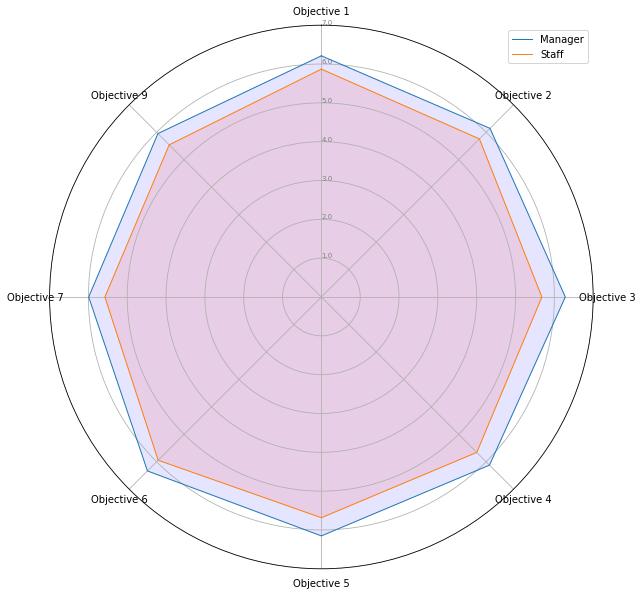

In [22]:
# Radar Graph
# Set data

radar_df = pd.DataFrame({
'group': ['Manager','Staff'],
'Objective 1': [managers_objective_1.mean(), staff_objective_1.mean()],
'Objective 2': [managers_objective_2.mean(), staff_objective_2.mean()],
'Objective 3': [managers_objective_3.mean(), staff_objective_3.mean()],
'Objective 4': [managers_objective_4.mean(), staff_objective_4.mean()],
'Objective 5': [managers_objective_5.mean(), staff_objective_5.mean()],
'Objective 6': [managers_objective_6.mean(), staff_objective_6.mean()],
'Objective 7': [managers_objective_7.mean(), staff_objective_7.mean()],
'Objective 9': [managers_objective_9.mean(), staff_objective_9.mean()]
})

## Draw Dart ##

# number of variable
categories=list(radar_df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
fig = plt.figure(figsize=(14, 10))
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([1,2,3,4,5,6,7], ["1.0","2.0","3.0","4.0","5.0","6.0","7.0"], color="grey", size=7)
plt.ylim(0,)

categories

## Plot Data ##

# Manager
values=radar_df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Manager")
ax.fill(angles, values, 'b', alpha=0.1)

# # Staff
values=radar_df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Staff")
ax.fill(angles, values, 'r', alpha=0.1)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))

# Show the graph
plt.show()

RESULTS

In [23]:
# Set Bargraph Data

# Labels
label_objective_1 = ['Q6', 'Q12', 'Q20', 'Q37', 'Q38']
label_objective_2 = ['Q4', 'Q7', 'Q9', 'Q34', 'Q35']
label_objective_3 = []
label_objective_4 = []
label_objective_5 = []
label_objective_6 = []
label_objective_7 = []
label_objective_8 = []
label_objective_9 = []

# Managers data
bar_managers_obj1 = [ managers_mean[5], managers_mean[11], managers_mean[19], managers_mean[36], managers_mean[37] ]
bar_managers_obj2 = [ managers_mean[3], managers_mean[6], managers_mean[8], managers_mean[33], managers_mean[34] ]
bar_managers_obj3 = []
bar_managers_obj4 = []
bar_managers_obj5 = []
bar_managers_obj6 = []
bar_managers_obj7 = []
bar_managers_obj8 = []
bar_managers_obj9 = []


# Staff data
bar_staff_obj1 = [ staff_mean[5], staff_mean[11], staff_mean[19], staff_mean[36], staff_mean[37] ]
bar_staff_obj2 = [ staff_mean[2], staff_mean[6], staff_mean[8], staff_mean[33], staff_mean[34] ]
bar_staff_obj3 = []
bar_staff_obj4 = []
bar_staff_obj5 = []
bar_staff_obj6 = []
bar_staff_obj7 = []
bar_staff_obj8 = []
bar_staff_obj9 = []


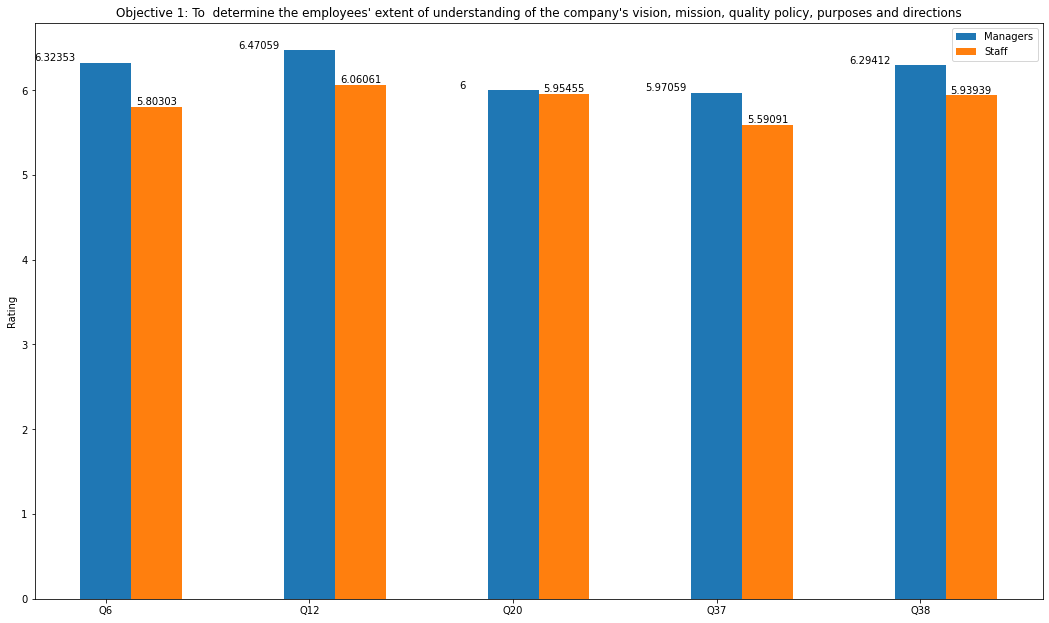

In [24]:
bar_objective_1 = [ label_objective_1, bar_managers_obj1, bar_staff_obj1 ]

X = np.arange(5)
width = 0.5  # the width of the bars

# fig, ax = plt.subplots()
rects1 = ax.bar(X - width/2, bar_objective_1[1], width, label='Managers')
rects2 = ax.bar(X + width/2, bar_objective_1[2], width, label='Staff')

fig = plt.figure(figsize=(14, 8))
ax = fig.add_axes([0,0,1,1])

ax.set_ylabel('Rating')
ax.set_title("Objective 1: To  determine the employees' extent of understanding of the company's vision, mission, quality policy, purposes and directions")
ax.set_xticks(X, bar_objective_1[0])

ax.bar(X + 0.00, bar_objective_1[1],  width = 0.25)
ax.bar(X + 0.25, bar_objective_1[2],  width = 0.25)
    
ax.legend(labels=['Managers', 'Staff'])

ax.bar_label(rects1)
ax.bar_label(rects2)

# fig.tight_layout()
plt.show()

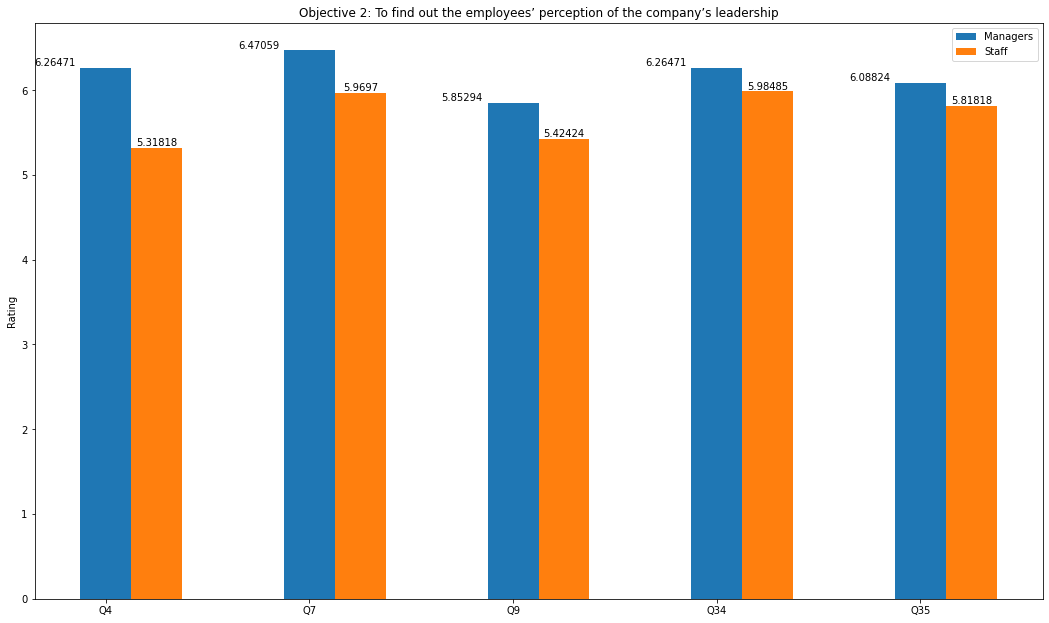

In [25]:
bar_objective_2 = [ label_objective_2, bar_managers_obj2, bar_staff_obj2 ]

X = np.arange(5)
width = 0.5  # the width of the bars

# fig, ax = plt.subplots()
rects1 = ax.bar(X - width/2, bar_objective_2[1], width, label='Managers')
rects2 = ax.bar(X + width/2, bar_objective_2[2], width, label='Staff')

fig = plt.figure(figsize=(14, 8))
ax = fig.add_axes([0,0,1,1])

ax.set_ylabel('Rating')
ax.set_title("Objective 2: To find out the employees’ perception of the company’s leadership")
ax.set_xticks(X, bar_objective_2[0])

ax.bar(X + 0.00, bar_objective_2[1],  width = 0.25)
ax.bar(X + 0.25, bar_objective_2[2],  width = 0.25)
    
ax.legend(labels=['Managers', 'Staff'])

ax.bar_label(rects1)
ax.bar_label(rects2)

# fig.tight_layout()
plt.show()

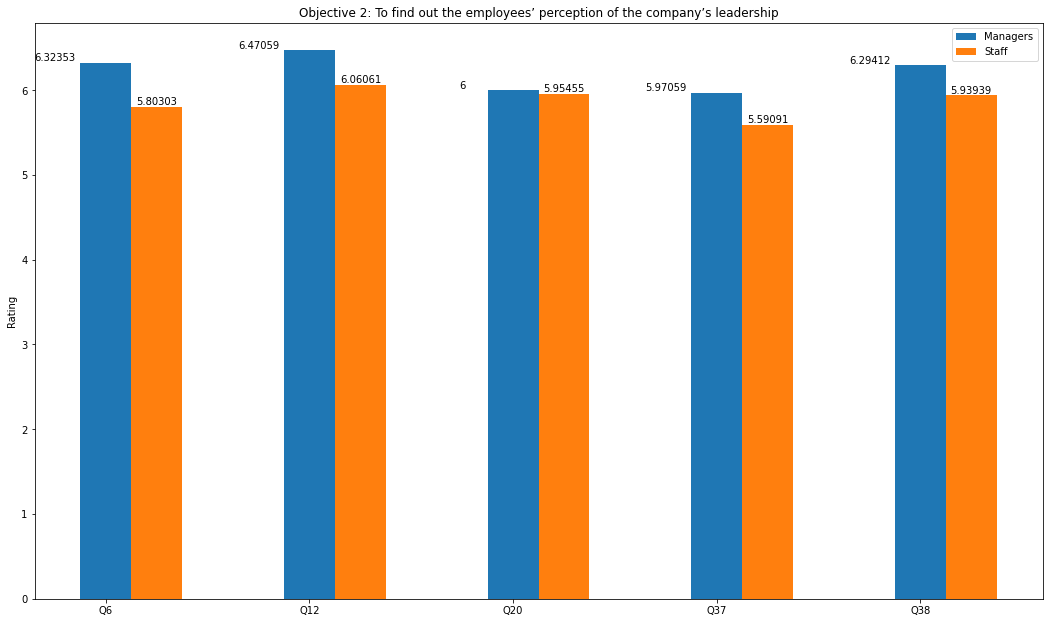

In [26]:
bar_objective_2 = [
    ['Q4', 'Q7', 'Q9', 'Q34', 'Q35'], 
    [ managers_mean[3], managers_mean[6], managers_mean[8], managers_mean[33], managers_mean[34] ], # Managers Questions Mean
    [ staff_mean[2], staff_mean[6], staff_mean[8], staff_mean[33], staff_mean[34] ] # Staff Questions Mean
]

X = np.arange(5)
width = 0.5  # the width of the bars

# fig, ax = plt.subplots()
rects1 = ax.bar(X - width/2, bar_objective_1[1], width, label='Managers')
rects2 = ax.bar(X + width/2, bar_objective_1[2], width, label='Staff')

fig = plt.figure(figsize=(14, 8))
ax = fig.add_axes([0,0,1,1])

ax.set_ylabel('Rating')
ax.set_title("Objective 2: To find out the employees’ perception of the company’s leadership")
ax.set_xticks(X, bar_objective_1[0])

ax.bar(X + 0.00, bar_objective_1[1],  width = 0.25)
ax.bar(X + 0.25, bar_objective_1[2],  width = 0.25)
    
ax.legend(labels=['Managers', 'Staff'])

ax.bar_label(rects1)
ax.bar_label(rects2)

# fig.tight_layout()
plt.show()

In [ ]:
    row2_1, row2_2, row2_3 = st.columns((1, 3, 1))
    
    bar_objective = []
    
    with row2_2:
        bar_objective.append([ label_objective[0], bar_managers_obj[0], bar_staff_obj[0] ])

        X = np.arange(5)
        width = 0.5  # the width of the bars

        # fig, ax = plt.subplots()
        rects1 = ax.bar(X - width/2, bar_objective[0][1], width, label='Managers')
        rects2 = ax.bar(X + width/2, bar_objective[0][2], width, label='Staff')

        fig = plt.figure(figsize=(14, 8))
        ax = fig.add_axes([0,0,1,1])

        ax.set_ylabel('Rating')
        ax.set_title("Objective 1: To  determine the employees' extent of understanding of the company's vision, mission, quality policy, purposes and directions")
        ax.set_xticks(X, bar_objective[0][0])

        ax.bar(X + 0.00, bar_objective[0][1],  width = 0.25)
        ax.bar(X + 0.25, bar_objective[0][2],  width = 0.25)

        ax.legend(labels=['Managers', 'Staff'])

        ax.bar_label(rects1)
        ax.bar_label(rects2)
        st.pyplot(fig)